## Hw 3
## Jonathan Reyes

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Set the style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
import warnings
warnings.filterwarnings('ignore')

## Part 1

In [45]:
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

In [46]:
# Print basic statistics
print("\nBasic Statistics of the California Housing Dataset:")
print(X.describe())


Basic Statistics of the California Housing Dataset:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000  

In [47]:
# Print general information
print("\nGeneral Information About the Dataset:")
print(X.info())


General Information About the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


In [48]:
# Check for missing values
print("\nMissing Values in the Dataset:")
print(X.isnull().sum())


Missing Values in the Dataset:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


### Looking at the data set there is not empty values in the dataset that was imported

## Part 2

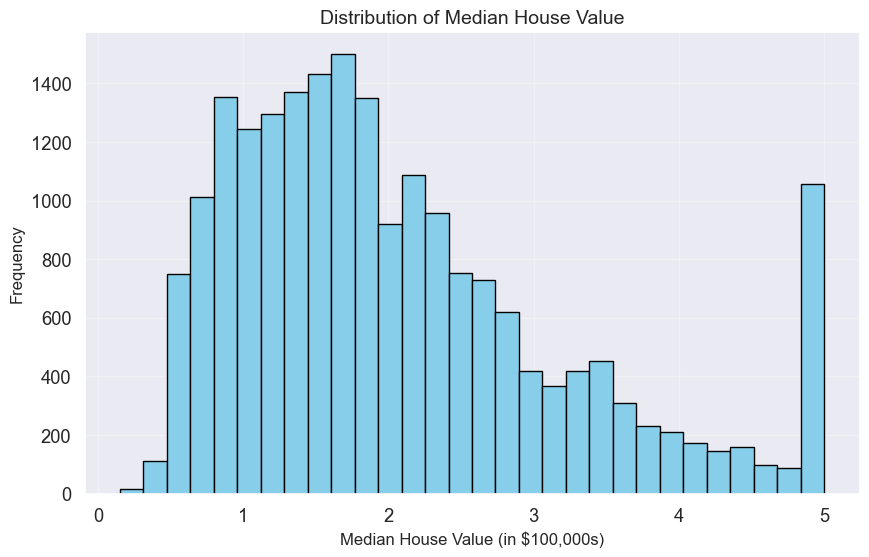

In [49]:
# Create a histogram of the median house value
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Median House Value', fontsize=14)
plt.xlabel('Median House Value (in $100,000s)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('house_value_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

### Looking at the graph we can see that the plot is skeewed to the right meaning that there is more houses at the lower range of prices in comparisont to the fewer amount of house in the higher price range, we can also notice that there is a heavy concentration of houses around the $150k to $300k price range

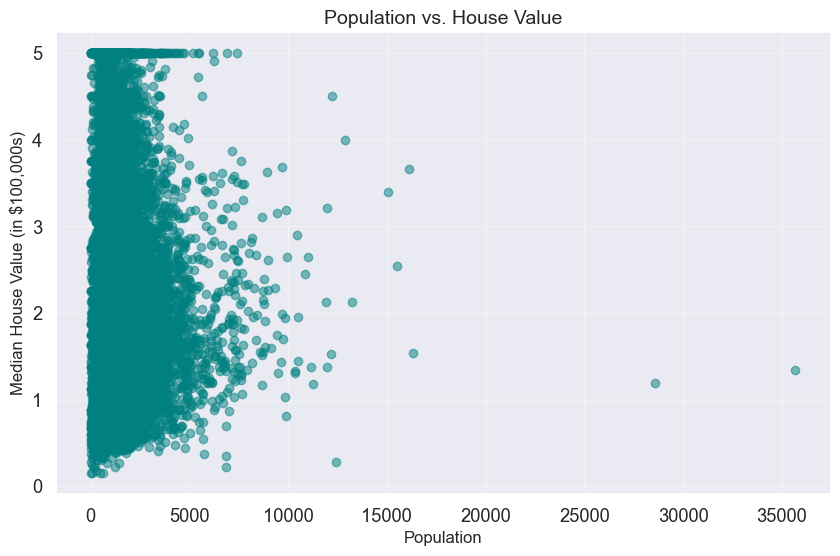

In [50]:
# Create a scatter plot of Population vs. House Value
plt.figure(figsize=(10, 6))
plt.scatter(X['Population'], y, alpha=0.5, color='teal')
plt.title('Population vs. House Value', fontsize=14)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Median House Value (in $100,000s)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('population_vs_house_value.png', dpi=300, bbox_inches='tight')
plt.show()

### Looking at the scatterplot there does not seem to be a strong linear relationship between the population and the house values, we can notice that most of the points are clustered around the lower population values with a few outliers at the higher populations. The values of the houses are also varied across different population sizes

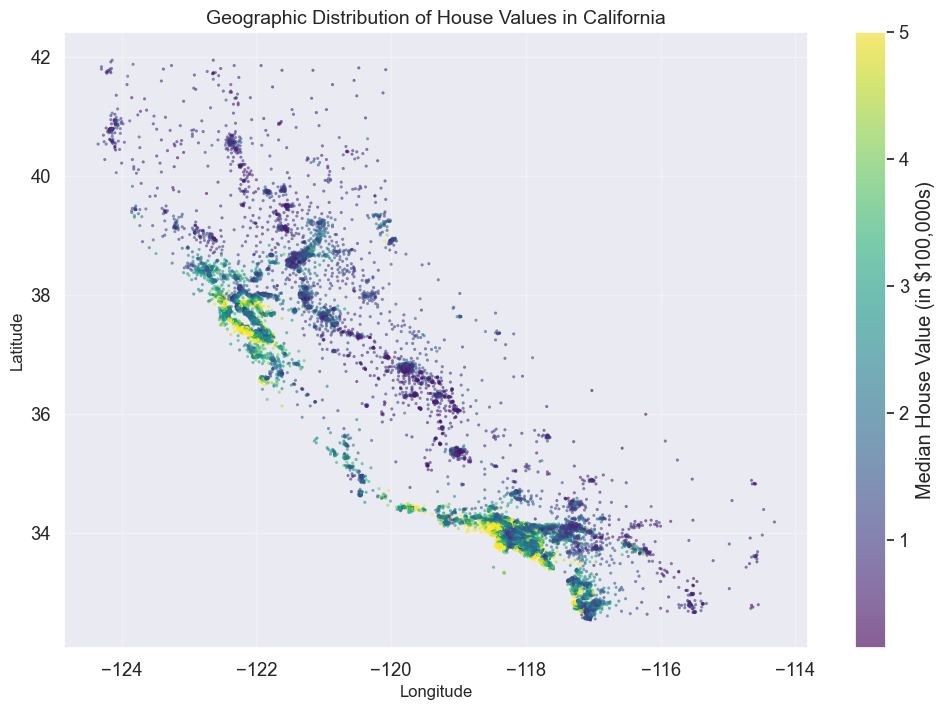

In [51]:
# Create a scatter plot of Longitude vs. Latitude, colored by house value
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X['Longitude'], X['Latitude'], c=y, cmap='viridis', 
                    alpha=0.6, s=5, edgecolors='none')
plt.colorbar(scatter, label='Median House Value (in $100,000s)')
plt.title('Geographic Distribution of House Values in California', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('geographic_house_values.png', dpi=300, bbox_inches='tight')
plt.show()

### The following plot shows the geographic distribution of house values in California with the coastal areas particularly around San Francisco and Los Angeles cordinates having higher house values shown in yellow/green, while the inland areas tend to have lower values which are shown in purple/blue. This demonstrates the significant impact of location on housing prices and the correlation of prices to the distance to major population centers.

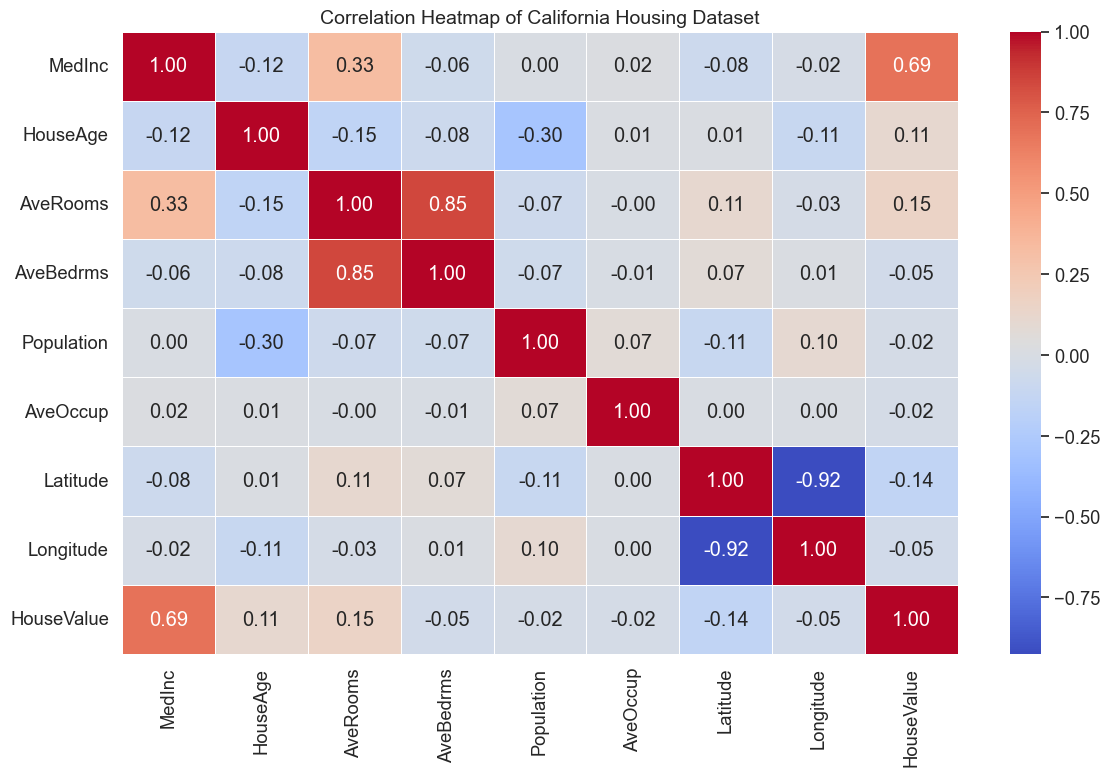

In [52]:
# Create a heatmap of correlations
plt.figure(figsize=(12, 8))
data_with_target = X.copy()
data_with_target['HouseValue'] = y
correlation_matrix = data_with_target.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of California Housing Dataset', fontsize=14)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

### Looking at the results of the heatmap we can observe that MedInc or the median income has the strongest positive correlation with house value (0.69) suggesting that areas with higher incomes tend to have higher  house values. Also Latitude and Longitude show moderate correlations confirming that location plays a significant role in house pricing.

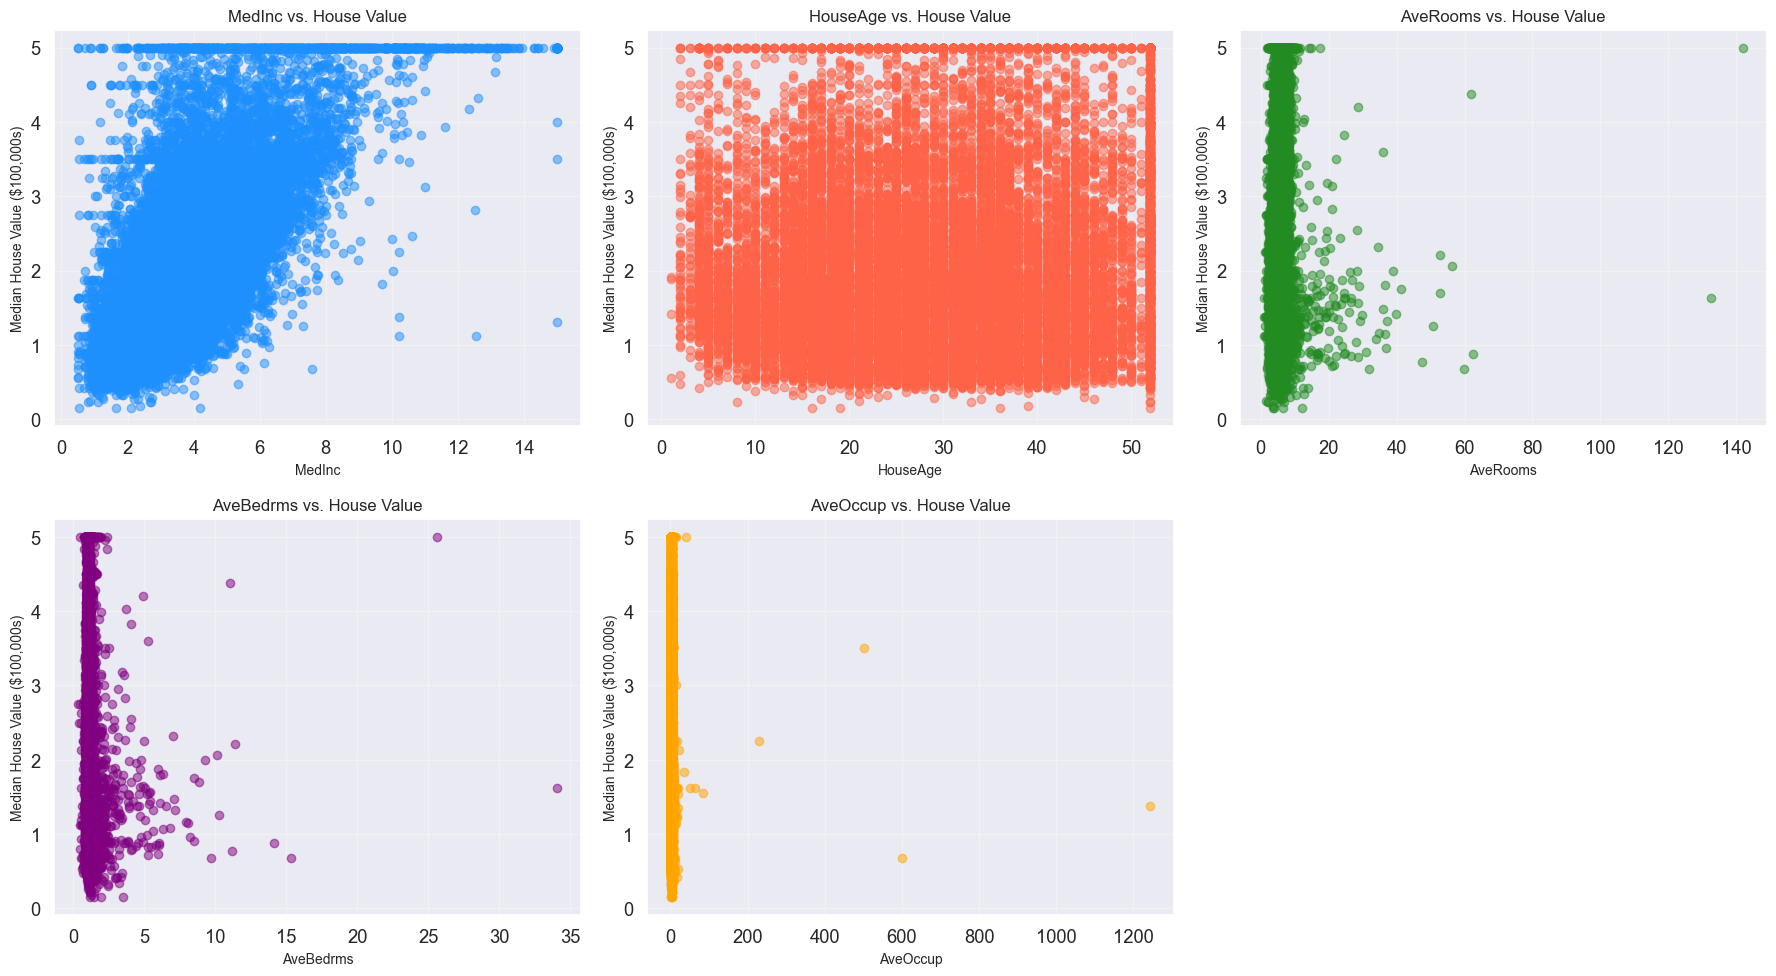

In [53]:
# Create scatter plots for various features vs. house value
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup']
colors = ['dodgerblue', 'tomato', 'forestgreen', 'purple', 'orange']

for i, feature in enumerate(features):
    row, col = i // 3, i % 3
    axes[row, col].scatter(X[feature], y, alpha=0.5, color=colors[i])
    axes[row, col].set_title(f'{feature} vs. House Value', fontsize=12)
    axes[row, col].set_xlabel(feature, fontsize=10)
    axes[row, col].set_ylabel('Median House Value ($100,000s)', fontsize=10)
    axes[row, col].grid(True, alpha=0.3)

# Remove the unused subplot
if len(features) < 6:
    fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.savefig('feature_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

### Looking at the scatter plots we can see that in the MedInc vs house value there is a strong positive correlation for which income might be a key predictor, in the house age vs house value there is no linear relationship, for the average rooms vs house value we can observe that there is a slight positive correlation, for average bedroom vs house value we can notice that there is a weak relationship between the two and for average occup vs house value we can observe that the values are majority in the lower occupancy with a couple of outliner in the higher ranges.

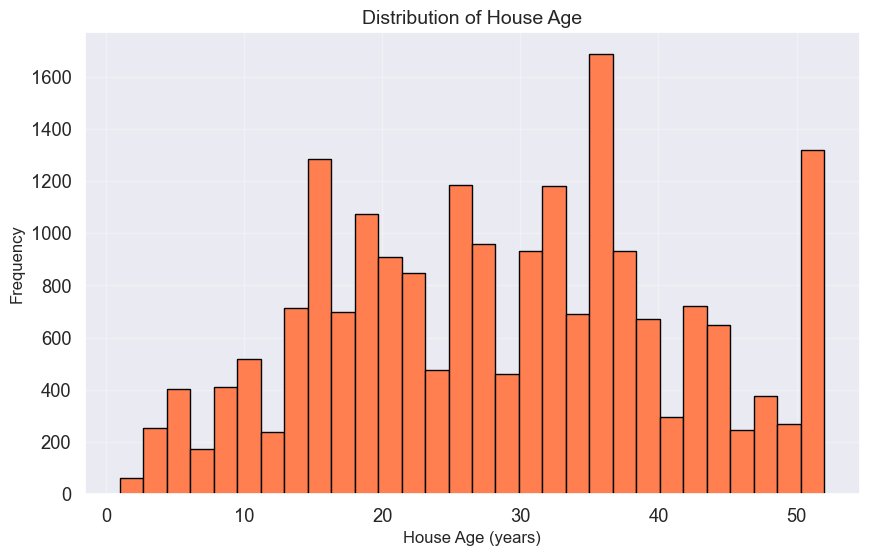

In [54]:
# Create a histogram for HouseAge
plt.figure(figsize=(10, 6))
plt.hist(X['HouseAge'], bins=30, color='coral', edgecolor='black')
plt.title('Distribution of House Age', fontsize=14)
plt.xlabel('House Age (years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('house_age_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

### The histogram plot shows that the ages of houses are not uniformly distributed and there is distinct jumps in housing development with some peaks at certain ages for example between 10-15 and 35-40 years. This is most likely because of different housing booms during the development of California

## Part 3

In [55]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [56]:
# Create a neural network model
nn_model = MLPRegressor(
    hidden_layer_sizes=(130, 64, 32, 16),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

In [57]:
# Train the model
print("Training the neural network regression model")
nn_model.fit(X_train, y_train)

Training the neural network regression model


MLPRegressor(early_stopping=True, hidden_layer_sizes=(130, 64, 32, 16),
             max_iter=1000, random_state=42)

In [58]:
# predictions
predictions = nn_model.predict(X_test)

In [59]:
# Evaluate the model
r2 = r2_score(y_test, predictions)
print(f"\nR² Score: {r2:.4f}")


R² Score: 0.7948


### From the performance scores of the model we can notice that the model performed well with the r^2 score sitting at 0.7948 and sometimes going down to 0.75 with different test runs. Thus this model explained around 75 to 80 percent of the variance in the prices of houses correctly based on the features that are provided.

### Experimentation

In [60]:
# Experimentation with different hidden layer sizes
print("\nExperimenting with different hidden layer sizes")

models = {
    "Small": MLPRegressor(hidden_layer_sizes=(32, 16), activation='relu', max_iter=1000, random_state=42),
    "Medium": MLPRegressor(hidden_layer_sizes=(64, 32, 16), activation='relu', max_iter=1000, random_state=42),
    "Large": MLPRegressor(hidden_layer_sizes=(256, 128, 64), activation='relu', max_iter=1000, random_state=42),
    "Very Large": MLPRegressor(hidden_layer_sizes=(512, 256, 128, 64), activation='relu', max_iter=1000, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score = r2_score(y_test, pred)
    results[name] = score
    print(f"{name} model - R² Score: {score:.4f}")


Experimenting with different hidden layer sizes
Small model - R² Score: 0.7842
Medium model - R² Score: 0.7913
Large model - R² Score: 0.7665
Very Large model - R² Score: 0.7761


In [61]:
# GridSearchCV for finding optimal parameters
print("\nPerforming GridSearchCV to find optimal parameters")
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64, 32), (200, 100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

grid_search = GridSearchCV(
    MLPRegressor(max_iter=1000, random_state=42),
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)


Performing GridSearchCV to find optimal parameters


In [62]:
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best R² score: {grid_search.best_score_:.4f}")

Best parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (64, 32), 'learning_rate': 'constant'}
Best R² score: 0.7907


In [63]:
# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_
best_predictions = best_model.predict(X_test)
best_r2 = r2_score(y_test, best_predictions)
print(f"Test R² score with best model: {best_r2:.4f}")

Test R² score with best model: 0.8038


### After experimenting with different parameters and settings for the classifier we can see that the best settings to use are {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (64, 32), 'learning_rate': 'constant'}, using these parameters we also got an improve R^2 score in comparison to the score we got earlier showing the slight improvements between the two models

## Part 4

In [64]:
# Import the Iris dataset
iris = load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris = iris.target

In [65]:
# Convert target to species names
species_names = iris.target_names
y_species = [species_names[i] for i in y_iris]

In [66]:
# Print basic statistics
print("\nBasic Statistics of the Iris Dataset:")
print(X_iris.describe())



Basic Statistics of the Iris Dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [67]:
# Print general information
print("\nGeneral Information About the Dataset:")
print(X_iris.info())


General Information About the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [68]:
# Check for missing values
print("\nMissing Values in the Dataset:")
print(X_iris.isnull().sum())


Missing Values in the Dataset:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


### Looking at the imported iris dataset we can notice that there is no missing values

In [69]:
# Add species column  for visualization
X_iris_with_species = X_iris.copy()
X_iris_with_species['species'] = y_species

<Figure size 1200x1000 with 0 Axes>

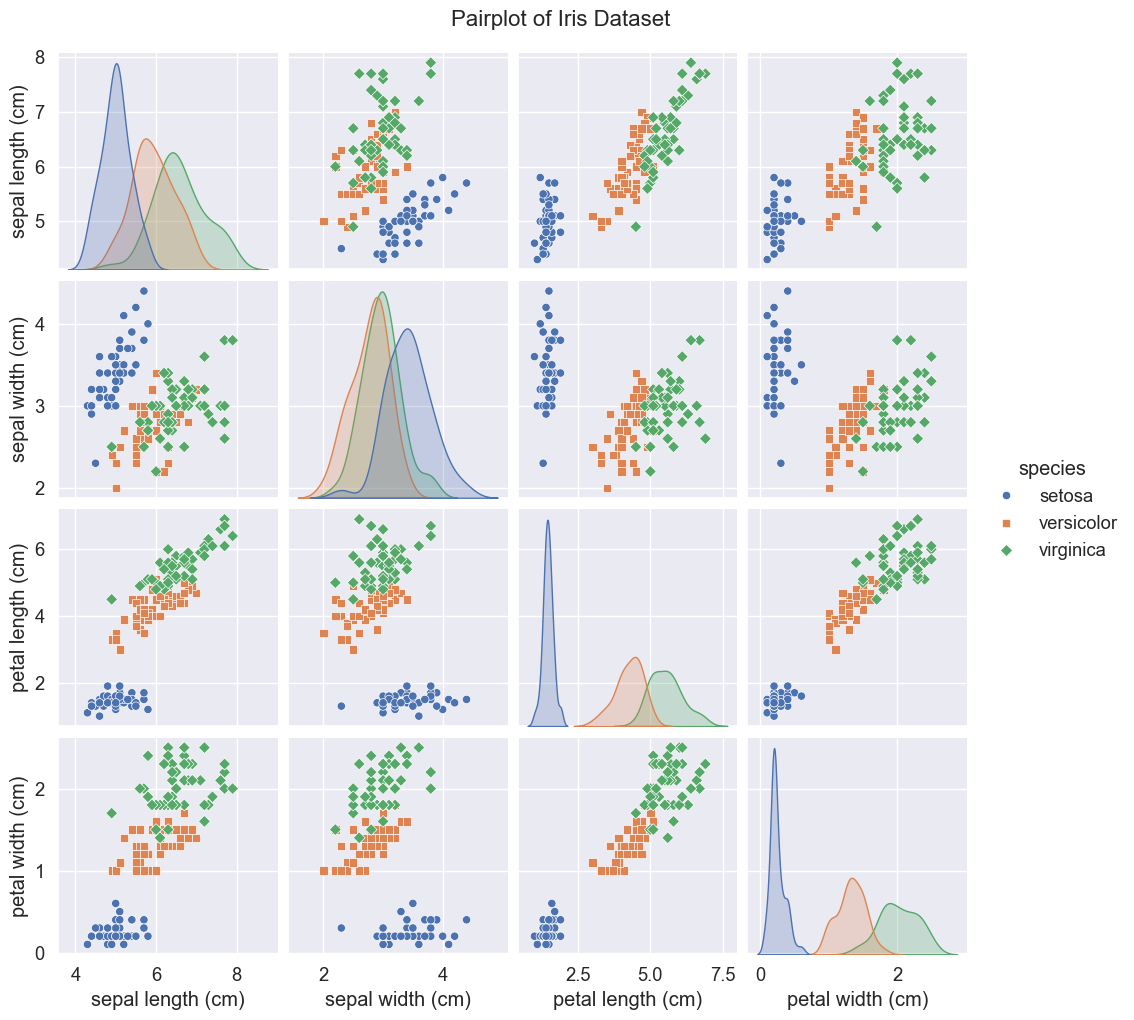

In [70]:
# Create a pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(X_iris_with_species, hue='species', height=2.5, markers=['o', 's', 'D'])
plt.suptitle('Pairplot of Iris Dataset', y=1.02, fontsize=16)
plt.savefig('iris_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

### Looking at the pair plot we can see that there is a clear seperations between the three species, especially in plots that are involving petal length and petal width. The Setosa is the most distinct species and can be seperated from the other species by just using a singular feature. While versicolor and virginica show more overlap but still can be distinguished using several features

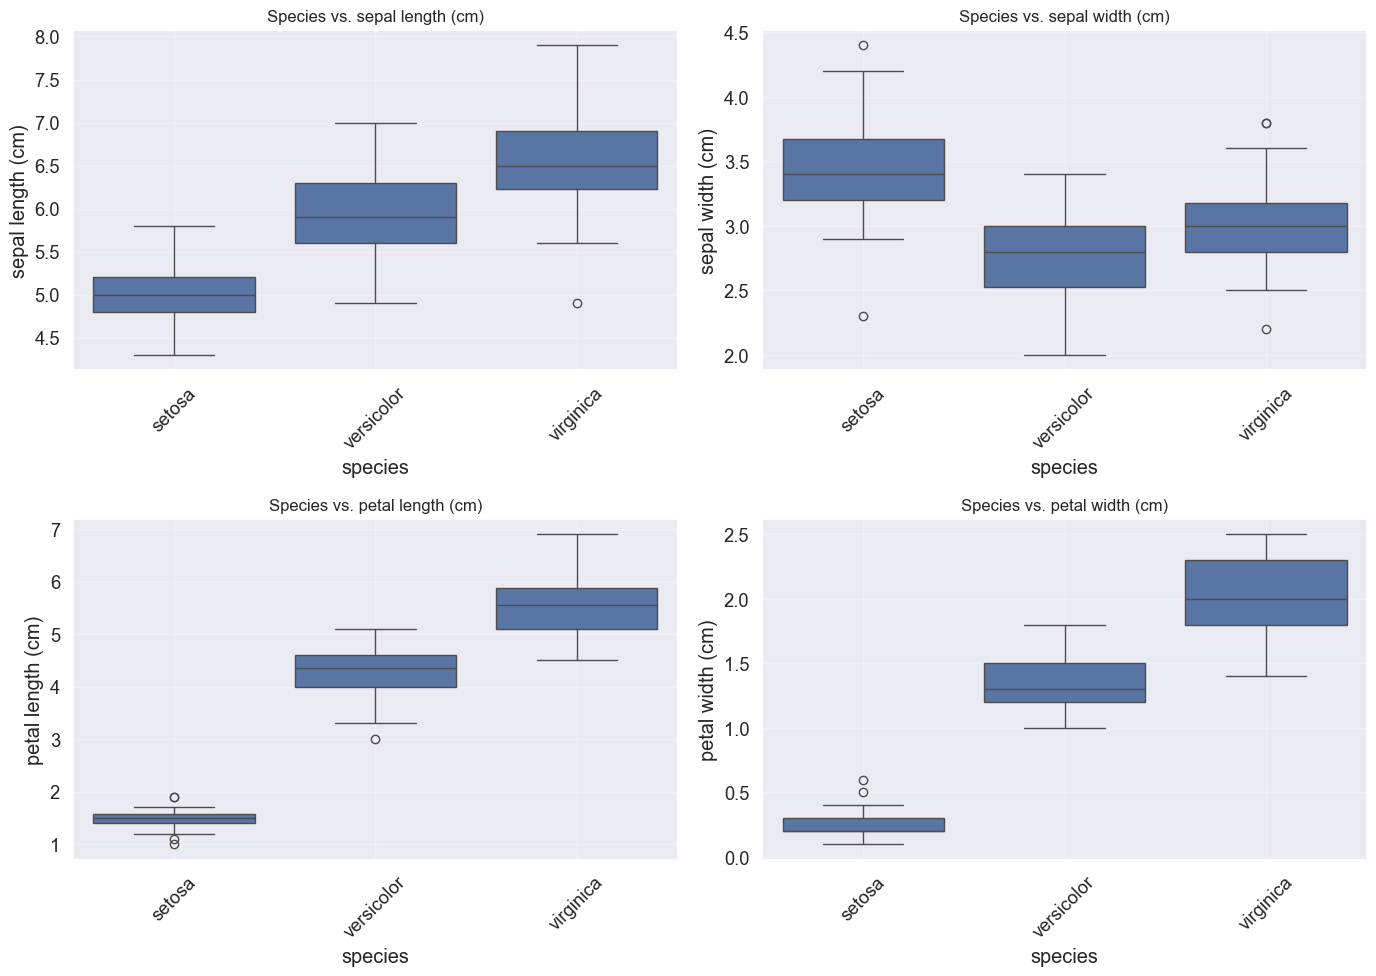

In [71]:
# Create boxplots
features = iris.feature_names
plt.figure(figsize=(14, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=X_iris_with_species)
    plt.title(f'Species vs. {feature}', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('iris_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

### For the sepal length boxplot we can observe that the setosa has the shortest sepal length on average, while Virginica tends to have the longest. There's some overlap between Versicolor and Virginica, but Setosa is clearly separated when looking at the two.

### For the sepal width boxplot interestingly, we can see that the setosa has the widest sepals despite having the shortest length while in comparison Versicolor has the narrowest sepals on average, with Virginica slightly wider.

### For petal length boxplot it shows dramatic differences as the setosa has much shorter petals than the other species in comparison Virginica has longer petals than Versicolor with minimal overlap.

### For the petal width boxplot we can notice that similar to petal length, this feature shows clear separation between all three species. Setosa has the narrowest petals, followed by Versicolor, and then Virginica.

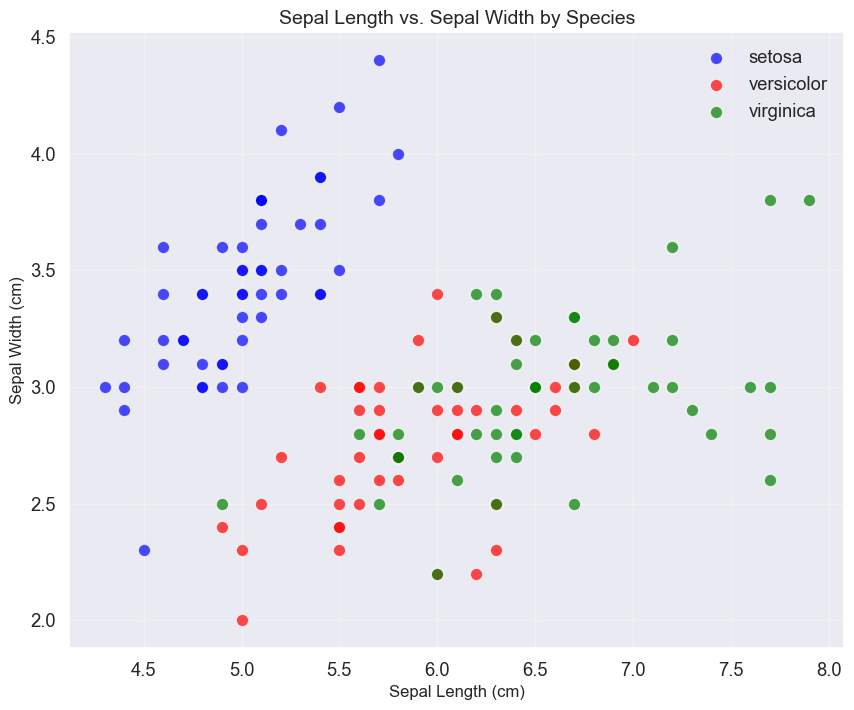

In [72]:
# Create a scatter plot of sepal length vs. sepal width colored by species
plt.figure(figsize=(10, 8))
for species, color in zip(species_names, ['blue', 'red', 'green']):
    subset = X_iris_with_species[X_iris_with_species['species'] == species]
    plt.scatter(
        subset['sepal length (cm)'],
        subset['sepal width (cm)'],
        c=color,
        label=species,
        alpha=0.7,
        edgecolors='w',
        s=80
    )

plt.title('Sepal Length vs. Sepal Width by Species', fontsize=14)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Sepal Width (cm)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('sepal_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

### Looking at the scatterplot we can observe that the setosa is completely seperated from the other two species which can also be noticed in previous plots based on the sepal measurements alone with the shorter sepals that are wider. Versicolor and Virginica also show considerable overlap in the dimensions making it difficult to determing them using only these two features

## Part 5

In [73]:
# Remove species column if it exists
if 'species' in X_iris.columns:
    X_iris = X_iris.drop('species', axis=1)

In [74]:
# Scale the data
iris_scaler = StandardScaler()
X_iris_scaled = iris_scaler.fit_transform(X_iris)

In [75]:
# Split the data
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris_scaled, y_iris, test_size=0.3, random_state=42
)

In [76]:
# Create a neural network for classification
clf_model = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64, 32),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

In [77]:
# Train the model
print("Training the neural network classification model")
clf_model.fit(X_iris_train, y_iris_train)

Training the neural network classification model


MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), max_iter=1000,
              random_state=42)

In [78]:
# predictions
iris_predictions = clf_model.predict(X_iris_test)

# Evaluate the model
accuracy = accuracy_score(y_iris_test, iris_predictions)
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 1.0000


### Looking at the performance of the model we can see that it performed very well with the accuracy falling in the 1.0 and sometimes dipped down to 0.95 when testing, this can be attributed to the random weigth initialization and how the data is being split up. This accuracy score should be expected because there is clear seperation between the classes which can be seen in the plots from earlier.

### Experimentation with different hidden layer sizes

In [79]:
clf_models = {
    "Small": MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', max_iter=1000, random_state=42),
    "Medium": MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=42),
    "Large": MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', max_iter=1000, random_state=42),
}

clf_results = {}
for name, model in clf_models.items():
    model.fit(X_iris_train, y_iris_train)
    pred = model.predict(X_iris_test)
    score = accuracy_score(y_iris_test, pred)
    clf_results[name] = score
    print(f"{name} model - Accuracy: {score:.4f}")

Small model - Accuracy: 1.0000
Medium model - Accuracy: 1.0000
Large model - Accuracy: 0.9778


In [80]:
# GridSearchCV for finding optimal parameters
print("\nPerforming GridSearchCV to find optimal parameters")
clf_param_grid = {
    'hidden_layer_sizes': [(32, 16), (64, 32), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}


Performing GridSearchCV to find optimal parameters


In [81]:
clf_grid_search = GridSearchCV(
    MLPClassifier(max_iter=1000, random_state=42),
    clf_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

In [82]:
clf_grid_search.fit(X_iris_train, y_iris_train)
print(f"Best parameters: {clf_grid_search.best_params_}")
print(f"Best accuracy score: {clf_grid_search.best_score_:.4f}")

Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate': 'constant'}
Best accuracy score: 0.9429


In [83]:
# Use the best model from GridSearchCV
best_clf_model = clf_grid_search.best_estimator_
best_iris_predictions = best_clf_model.predict(X_iris_test)
best_accuracy = accuracy_score(y_iris_test, best_iris_predictions)
print(f"Test accuracy with best model: {best_accuracy:.4f}")

Test accuracy with best model: 0.9778


<Figure size 800x600 with 0 Axes>

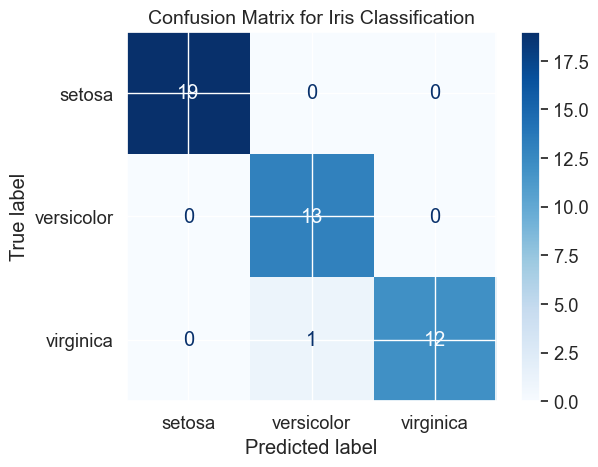

In [84]:
# Create confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_iris_test, best_iris_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Iris Classification', fontsize=14)
plt.savefig('iris_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

### After experimentation with different sizes and setting, the best settings for this classification task appears to be {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate': 'constant'}.These parameters achieved a cross validation accuracy of 0.9778 which is really good for this task. Based on the parameters the model works best with minimal regularization and compared to the original it can be seen that simplyfiying the classification task performed better.

### The confusion matrix shows that most samples were correctly classified, with only a few misclassifications between Versicolor and Virginica, which is consistent with the overlap we observed in the visualization phase and makes the classification task harder to be accurate due to the overlap.